<AxesSubplot:>

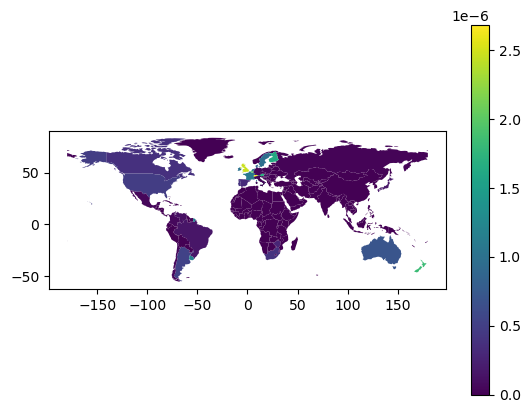

In [85]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium

driver_count = drivers.groupby("nationality").agg({"driverId": "nunique"}).reset_index()


driverID = driver_count.sort_values(by="driverId", ascending=False)

nationality_to_country = {
    'British': 'United Kingdom',
    'American': 'United States of America',
    'Italian': 'Italy',
    'French': 'France',
    'German': 'Germany',
    'Brazilian': 'Brazil',
    'Argentine': 'Argentina',
    'Swiss': 'Switzerland',
    'South African': 'South Africa',
    'Belgian': 'Belgium',
    'Japanese': 'Japan',
    'Dutch': 'Netherlands',
    'Australian': 'Australia',
    'Austrian': 'Austria',
    'Spanish': 'Spain',
    'Canadian': 'Canada',
    'Swedish': 'Sweden',
    'Finnish': 'Finland',
    'New Zealander': 'New Zealand',
    'Mexican': 'Mexico',
    'Danish': 'Denmark',
    'Irish': 'Ireland',
    'Russian': 'Russia',
    'Rhodesian': 'Zimbabwe',
    'Portuguese': 'Portugal',
    'Uruguayan': 'Uruguay',
    'Monegasque': 'Monaco',
    'Venezuelan': 'Venezuela',
    'East German': 'Germany',
    'Colombian': 'Colombia',
    'Thai': 'Thailand',
    'Indian': 'India',
    'Malaysian': 'Malaysia',
    'Liechtensteiner': 'Liechtenstein',
    'Indonesian': 'Indonesia',
    'Polish': 'Poland',
    'American-Italian': 'Italy', # can be ambiguous
    'Hungarian': 'Hungary',
    'Czech': 'Czech Republic',
    'Chinese': 'China',
    'Chilean': 'Chile',
    'Argentine-Italian': 'Italy' # can be ambiguous
}

driverID['nationality'] = driverID['nationality'].replace(nationality_to_country)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
column_names = { "name" : "nationality"}
world_name = world.rename(columns = column_names)

merged = pd.merge(world_name,
                       driverID[["nationality","driverId"]],
                       on = "nationality",
                       how = "left")

merged = merged.fillna(0)
merged["Ratio"] = merged["driverId"]/merged["pop_est"]

merged = merged[(merged.pop_est>0) & (merged.nationality!="Antarctica")]
fig, ax = plt.subplots(1, 1)

merged.plot(column='Ratio', ax=ax, figsize= (300, 200), legend=True)









         pop_est      continent               nationality iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
175    6944975.0         Europe                    Serbia    SRB       51475   
176     622137.0         Europe                Montenegro    MNE        5542   
177    1794248.0         Europe                    Kosovo    -99        7926   
178    1394973.0  North America       Trinidad and Tobago    TTO       24269   
179   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

<AxesSubplot:>

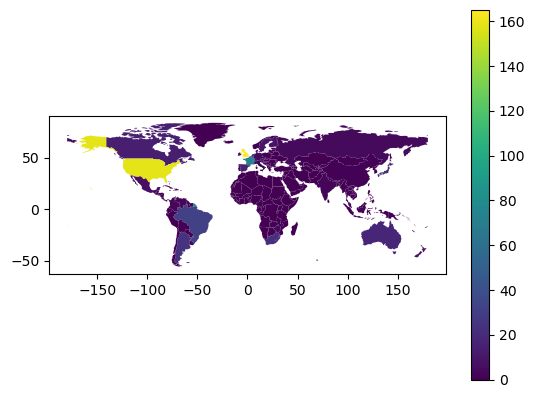

Number of countries represented in Formula 1: 42
          nationality  driverId
8             British       165
0            American       158
24            Italian        99
18             French        73
19             German        50
7           Brazilian        32
2           Argentine        24
38              Swiss        23
35      South African        23
6             Belgian        23
25           Japanese        20
15              Dutch        18
4          Australian        18
5            Austrian        15
36            Spanish        15
9            Canadian        14
37            Swedish        10
17            Finnish         9
30      New Zealander         9
28            Mexican         6
14             Danish         5
23              Irish         5
34            Russian         4
33          Rhodesian         4
32         Portuguese         4
40          Uruguayan         4
29         Monegasque         4
41         Venezuelan         3
16        East German  

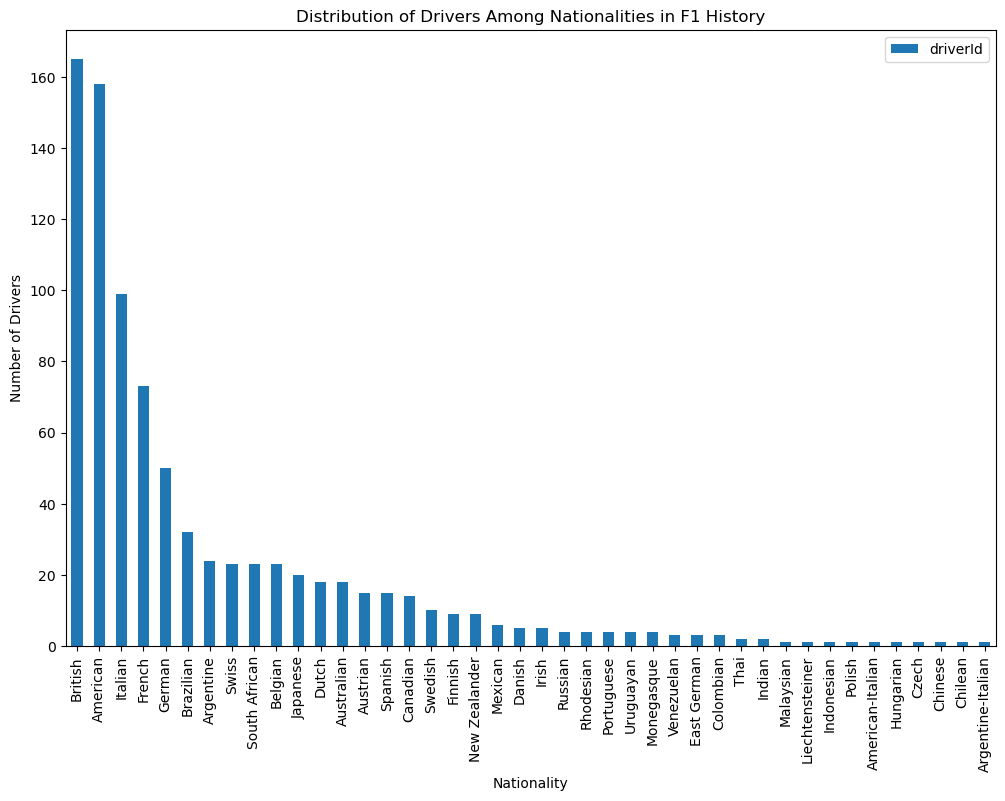

          nationality  driverId
8             British       165
0            American       158
24            Italian        99
18             French        73
19             German        50
7           Brazilian        32
2           Argentine        24
38              Swiss        23
35      South African        23
6             Belgian        23
25           Japanese        20
15              Dutch        18
4          Australian        18
5            Austrian        15
36            Spanish        15
9            Canadian        14
37            Swedish        10
17            Finnish         9
30      New Zealander         9
28            Mexican         6
14             Danish         5
23              Irish         5
34            Russian         4
33          Rhodesian         4
32         Portuguese         4
40          Uruguayan         4
29         Monegasque         4
41         Venezuelan         3
16        East German         3
12          Colombian         3
39      

In [58]:

driver_count = drivers.groupby("nationality").agg({"driverId": "nunique"}).reset_index()
print("Number of countries represented in Formula 1: " + str(len(driver_count)))
driver_count = driver_count.sort_values(by="driverId", ascending=False)
driver_count.plot.bar(x="nationality", y="driverId", figsize=(12, 8), title="Distribution of Drivers Among Nationalities in F1 History")

print(driver_count)

plt.xlabel("Nationality")
plt.ylabel("Number of Drivers")
plt.show()
print(driver_count)


